In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
housing = pd.read_csv('housing.csv')

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
nan_val = pd.isnull(housing)

In [7]:
nan_val.sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean()) 

In [9]:
housing['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [10]:
nan_val2 = pd.isnull(housing['total_bedrooms'])

In [11]:
nan_val2.sum()

0

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()

In [13]:
ocean_col = housing[["ocean_proximity"]]
encoded_ocean = ord_encoder.fit_transform(ocean_col)

In [12]:
encoded_ocean.dtype
housing = housing.drop(["ocean_proximity"],axis=1)

In [13]:
housing["ocean_proximity_num"] = encoded_ocean

In [14]:
shuffled_indices = np.random.permutation(len(housing))
test_size = int(len(housing)*0.2)
test_indices = shuffled_indices[:test_size]
train_indices = shuffled_indices[test_size:]
train_data = housing.iloc[train_indices]
test_data = housing.iloc[test_indices]

Y_train = train_data['median_house_value']
X_train = pd.DataFrame(train_data)
X_train = X_train.drop(['median_house_value'],axis=1)

Y_test = test_data['median_house_value']
X_test = pd.DataFrame(test_data)
X_test = X_test.drop(['median_house_value'],axis=1)

In [15]:
corr = X_train.corr()

In [16]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_num
longitude,1.000000,-0.924249,-0.112727,0.047573,0.073097,0.102550,0.058759,-0.015380,-0.290423
latitude,-0.924249,1.000000,0.015317,-0.039771,-0.071096,-0.112355,-0.075429,-0.080261,0.201329
housing_median_age,-0.112727,0.015317,1.000000,-0.357016,-0.316551,-0.289966,-0.299949,-0.118115,0.118112
total_rooms,0.047573,-0.039771,-0.357016,1.000000,0.927298,0.856213,0.918390,0.198847,-0.019839
total_bedrooms,0.073097,-0.071096,-0.316551,0.927298,1.000000,0.873206,0.973588,-0.006710,-0.019817
population,0.102550,-0.112355,-0.289966,0.856213,0.873206,1.000000,0.907230,0.004360,-0.075557
households,0.058759,-0.075429,-0.299949,0.918390,0.973588,0.907230,1.000000,0.013565,-0.022883
median_income,-0.015380,-0.080261,-0.118115,0.198847,-0.006710,0.004360,0.013565,1.000000,-0.018973
ocean_proximity_num,-0.290423,0.201329,0.118112,-0.019839,-0.019817,-0.075557,-0.022883,-0.018973,1.000000


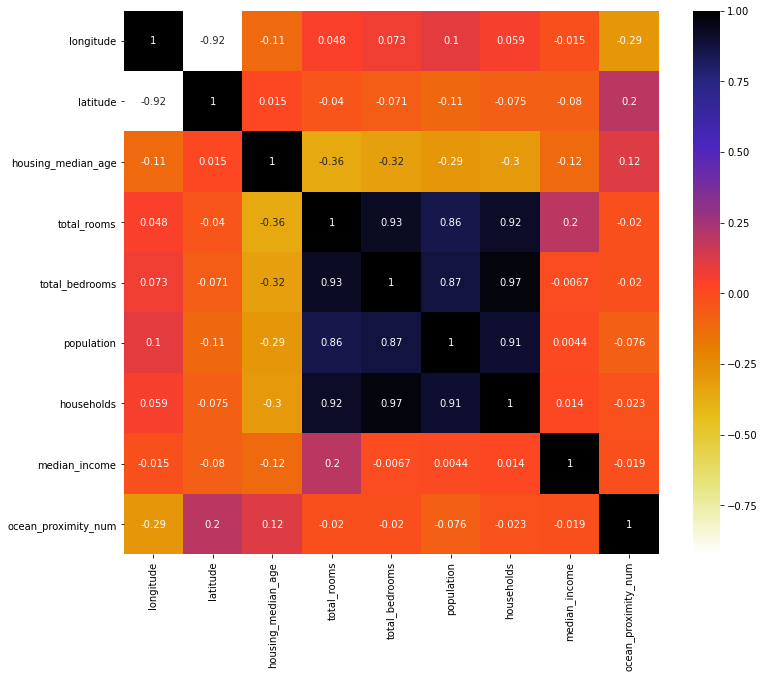

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(corr , annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [18]:
def correlation(ds,threshold):
    corr_col = set()
    corr_table = ds.corr()
    for i in range(len(corr_table.columns)):
        for j in range (i):
            if corr_table.iloc[i,j] > threshold:
                col = corr_table.columns[i]
                corr_col.add(col)
    return corr_col

In [19]:
corr_feats = correlation(X_train,0.90)

In [20]:
corr_feats

{'households', 'total_bedrooms'}

In [23]:
X_train = X_train.drop(corr_feats,axis=1)   

In [24]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,median_income,ocean_proximity_num
10705,-117.72,33.61,26.0,2033.0,618.0,2.5685,0.0
7813,-118.11,33.90,35.0,2604.0,1465.0,4.4896,0.0
12420,-116.20,33.70,26.0,2399.0,2654.0,2.2989,1.0
16681,-120.56,35.13,15.0,5818.0,2324.0,4.4033,0.0
3968,-118.58,34.20,35.0,1558.0,793.0,5.1463,0.0
...,...,...,...,...,...,...,...
9085,-118.17,34.67,5.0,8352.0,3723.0,4.5659,1.0
3402,-118.35,34.27,32.0,604.0,314.0,6.2037,0.0
9792,-121.87,36.55,20.0,10053.0,3083.0,5.1506,4.0
8375,-118.35,33.95,28.0,4770.0,3201.0,2.6810,0.0


In [25]:
X_test = X_test.drop(corr_feats,axis=1)

In [26]:
X_test

,longitude,latitude,housing_median_age,total_rooms,population,median_income,ocean_proximity_num
19610,-121.14,37.48,6.0,1772.0,1011.0,3.7045,1.0
10980,-117.84,33.77,26.0,3350.0,1314.0,3.5195,0.0
6318,-117.97,34.01,33.0,2006.0,1410.0,3.7083,0.0
8578,-118.41,33.89,35.0,1194.0,507.0,9.0812,0.0
8084,-118.19,33.81,23.0,954.0,804.0,2.5833,4.0
...,...,...,...,...,...,...,...
11590,-118.01,33.78,26.0,2343.0,1166.0,6.0000,0.0
7023,-118.10,33.98,33.0,1927.0,1623.0,3.5268,0.0
18882,-122.25,38.10,52.0,1780.0,824.0,2.7500,3.0
11217,-117.93,33.80,34.0,3903.0,2054.0,4.2731,0.0


In [27]:
import xgboost

In [28]:
grad_model = xgboost.XGBRegressor()
grad_model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
Y_grad_model_pred = grad_model.predict(X_test)

In [32]:
grad_model.score(X_test,Y_test)

0.8337747543085585

In [33]:
# Xgboost score after dropping correlated columns : 0.8337747543085585